In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import data as sk

Read image

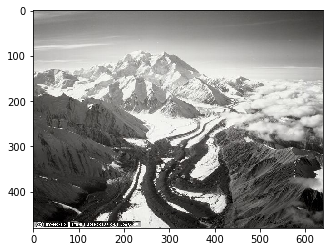

In [2]:
img = sk.imread("gletscher.jpg")
#img = mpimg.imread()
plt.imshow(img)

Change image to float values

In [3]:
img = img.astype(float)

Scale the image between 0 and 1

In [4]:
m = np.amax(img)
print(m)
print(img.shape)
new_img = np.zeros(img.shape)
for x in range(new_img.shape[0]):
    for y in range(new_img.shape[1]):
        for p in range(new_img.shape[2]):
            new_img[x][y][p] = img[x][y][p] / m

255.0
(480, 639, 3)


Make sure highest value is 1.0

In [5]:
n = np.amax(new_img)
print(n)

1.0


a: Schreiben Sie eine Python-Funktion, mit der sich ein Bild affin transformieren läßt. Übergabeparameter sind die Matrix A, der Verschiebungsvektor a_0 und das Eingangsbild, zurückgegeben wird das affin verzerrte Ausgangsbild. Sehen Sie dabei vor, daß der Benutzer zwischen Nächster-Nachbar- und bilinearer Interpolation wählen kann. Alle Pixel, deren Ausgangsposition außerhalb des Eingangsbildes liegen, werden auf 0 gesetzt. Die Funktion soll sowohl Grauwert- als auch Farbbilder verarbeiten können.

In [30]:
def affine_transformation(A, vec, img, t_type = "neighbor"):
    img_m = np.zeros((np.max(img.shape)*2, np.max(img.shape)*2, img.shape[2]))
    for x in range(img_m.shape[0]):
        for y in range(img_m.shape[1]):
            origin = np.linalg.inv(A).dot(np.array(([x], [y])) - vec)
            
            # Interpolation
            img_m[x,y] = interpolate(origin, img, t_type)
    
    return img_m

In [31]:
def interpolate(origin, img, t_type):
    if (np.absolute(origin[0]) < img.shape[0]-1 and np.absolute(origin[1]) < img.shape[1]-1):
                
        # Berechnung der vier nächsten Punkte zum origin
        p1 = [int(np.floor(origin[0][0])), int(np.floor(origin[1][0]))]
        p2 = [int(np.ceil(origin[0][0])), int(np.floor(origin[1][0]))]
        p3 = [int(np.floor(origin[0][0])), int(np.ceil(origin[1][0]))]
        p4 = [int(np.ceil(origin[0][0])), int(np.ceil(origin[1][0]))]

        if t_type == "bilinear":
            # Berechnung der vier Gewichtungsflaechen
            A1 = np.absolute(origin[0][0] - p1[0]) * np.absolute(origin[1][0] - p1[1])
            A2 = np.absolute(origin[0][0] - p2[0]) * np.absolute(origin[1][0] - p2[1])
            A3 = np.absolute(origin[0][0] - p3[0]) * np.absolute(origin[1][0] - p3[1])
            A4 = np.absolute(origin[0][0] - p4[0]) * np.absolute(origin[1][0] - p4[1])
            
            # Falls die Gewichtung immer null ergibt, wird der erste Punkt verwendet
            if (A1 == 0 and A2 == 0 and A3 == 0 and A4 == 0):
                g = img[p1[0], p1[1]]
            else:
                # Gewichtung der Punkte
                g = A4 * img[p1[0], p1[1]] + A3 * img[p2[0], p2[1]] + A2 * img[p3[0], p3[1]] + A1 * img[p4[0], p4[1]]
        
        elif t_type == "neighbor":
            # Berechnung der euklidischen Abstaende
            D1 = np.sqrt(np.absolute(origin[0][0] - p1[0])**2 + np.absolute(origin[1][0] - p1[1])**2)
            D2 = np.sqrt(np.absolute(origin[0][0] - p2[0])**2 + np.absolute(origin[1][0] - p2[1])**2)
            D3 = np.sqrt(np.absolute(origin[0][0] - p3[0])**2 + np.absolute(origin[1][0] - p3[1])**2)
            D4 = np.sqrt(np.absolute(origin[0][0] - p4[0])**2 + np.absolute(origin[1][0] - p4[1])**2)
            
            # Verwendung des naechsten Punktes
            if D1 == np.min([D1, D2, D3, D4]):
                g = img[p1[0], p1[1]]
            elif D2 == np.min([D1, D2, D3, D4]):
                g = img[p2[0], p2[1]]
            elif D3 == np.min([D1, D2, D3, D4]):
                g = img[p3[0], p3[1]]
            else:
                g = img[p4[0], p4[1]]
                         
        # Verwendung der erhaltenen Farbwerte
        return g

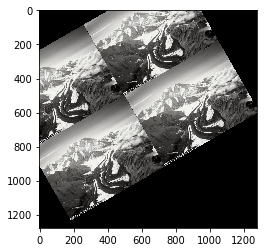

In [34]:
theta = np.pi/6
c, s = np.cos(theta), np.sin(theta)
R = np.array(((c, -s), (s, c)))
#print(R)
T = np.array(([500], [500]))
#print(T)

at = affine_transformation(R, T, new_img, "bilinear")
plt.imshow(at)